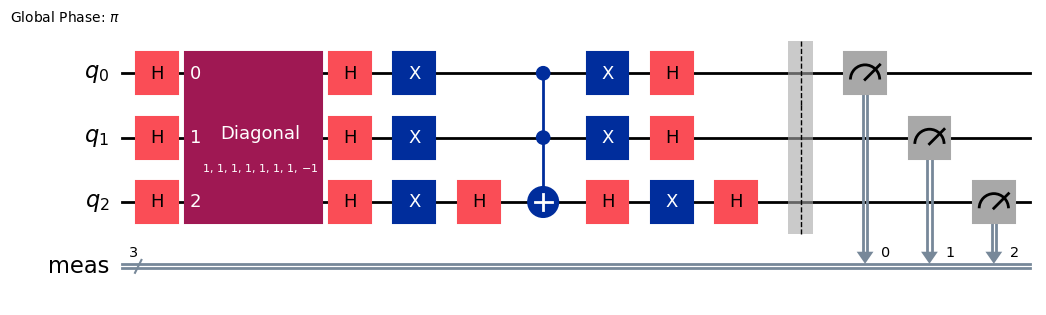

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import grover_operator, DiagonalGate
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke

oracle_gate = DiagonalGate([1] * 7 + [-1])
oracle = QuantumCircuit(3)
oracle.append(oracle_gate, [0, 1, 2])

qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc = qc.compose(grover_operator(oracle))
if qc is None:
    raise ValueError("qc is None")

qc.measure_all()

qc.draw(output='mpl')

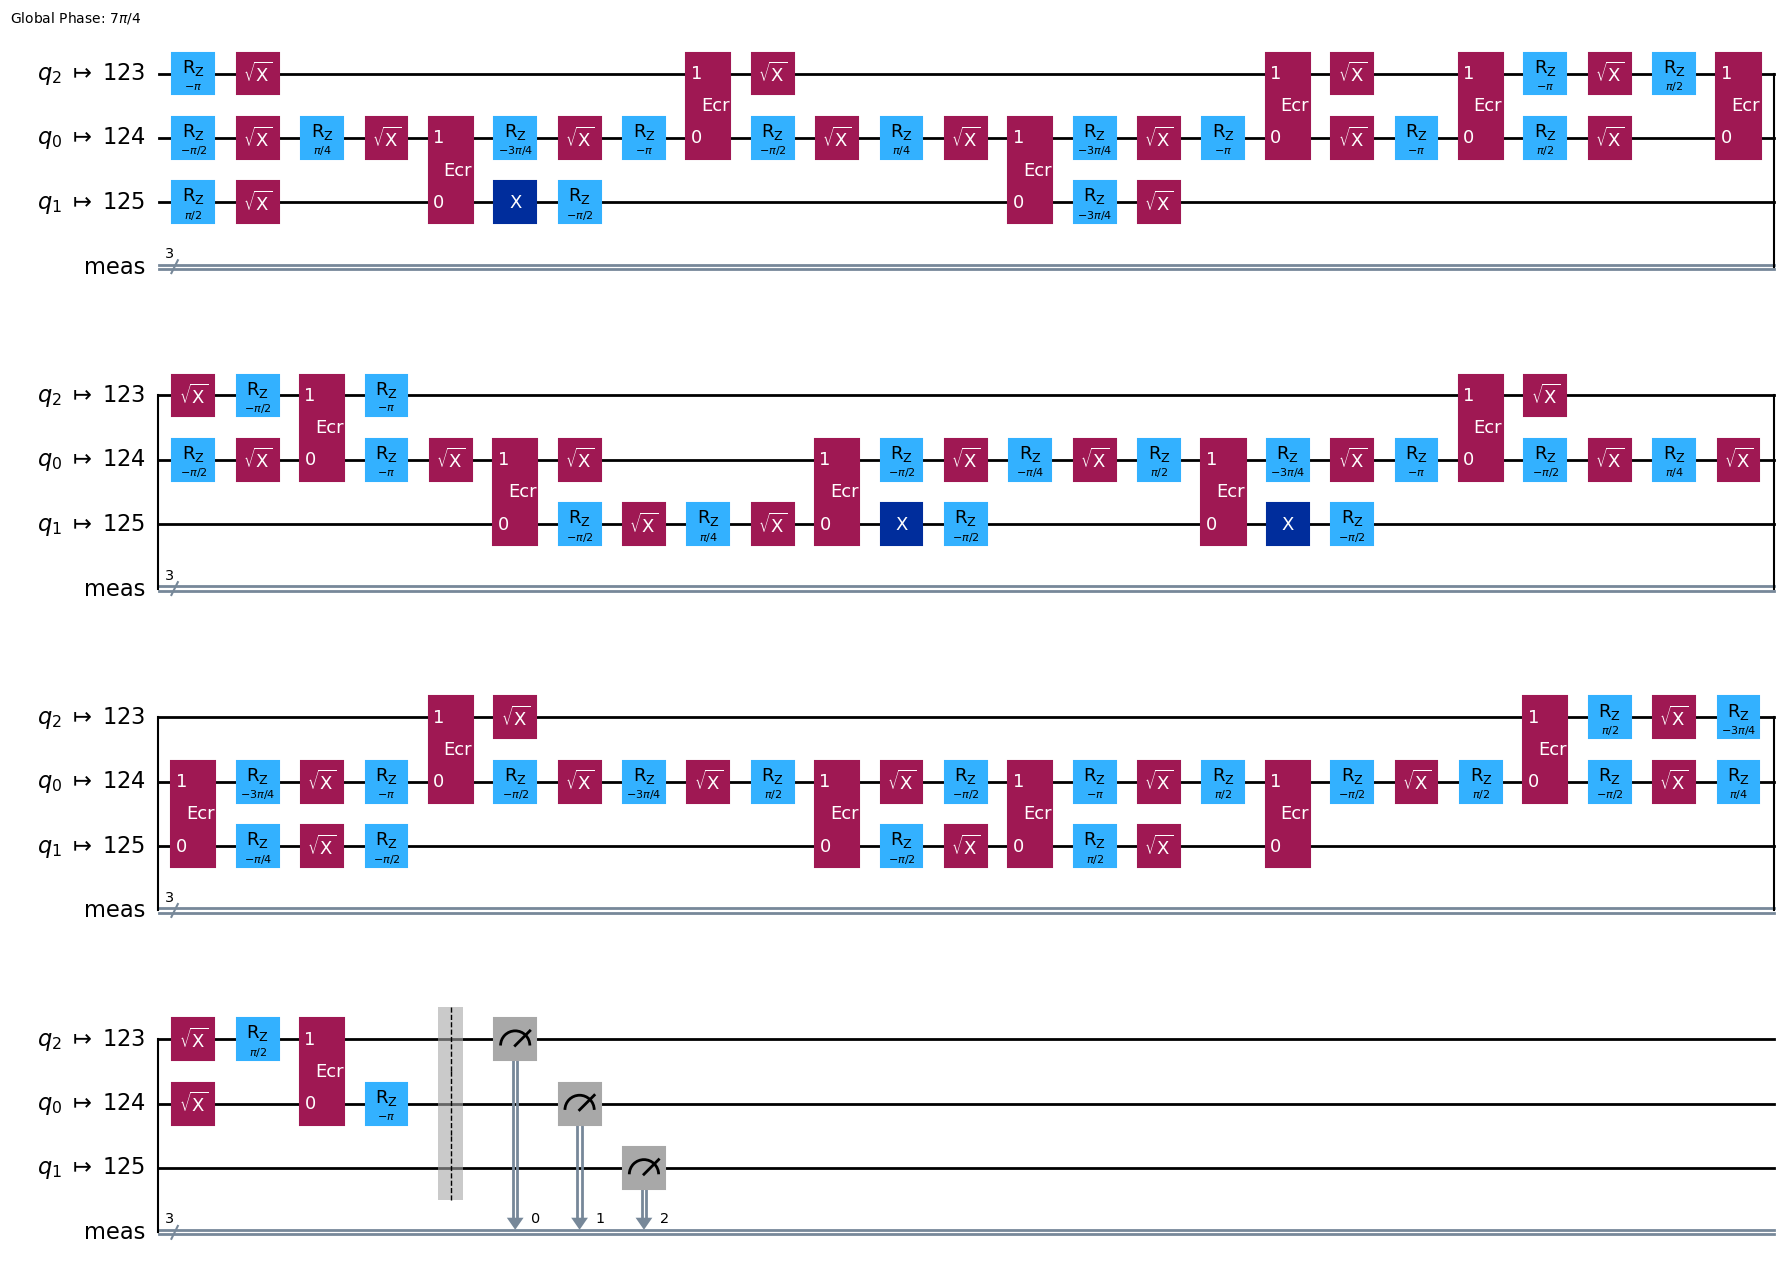

In [2]:
from qiskit.transpiler import generate_preset_pass_manager

backend = FakeSherbrooke()

pass_manager = generate_preset_pass_manager(
    optimization_level=1, backend=backend
)
transpiled_circuit = pass_manager.run(qc)

transpiled_circuit.draw(output='mpl')